# Practical Data Science with Python - Descriptive Statistics for World GDP per Capita

The only way to gain proficiency in working with data is through experience. Theory can be important, but unless you have a decent amount of hands-on experience to draw upon, it will remain abstract, and you will be unequipped to to handle the kinds of issues that present themselves when you work with real data in a practical way. The aim of these lessons is to provide self-contained scenarios where you can develop your Data Science Skills using real data and Python programming. 

## The task:

> Display a boxplot for a dataset containing World GDP per Capita figures for 2017

Data source: <https://www.worldometers.info/gdp/gdp-per-capita/>

### GDP per Capita

*Gross Domestic Product (GDP) per capita shows a country's GDP divided by its total population. The dataset used in this lesson lists countries in the world ranked by nominal GDP per capita. It also includes data for Purchasing Power Parity (PPP) per capita, but we will not use it here.*

Data file available here: TBC

The code in this lesson was written in a Juypter Notebook. This means it can be run sequentially using IPython. If you wish to use non-interactive Python you can create a `.py` file and run it as you normally would, omitting any special directives such as `%load_ext nb_black`. You may also need to add `print` statements in some situations to obtain output.

In [2]:
# Optional auto-formatting. Installation required (`pip install nb_black`)
%load_ext nb_black

# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [3]:
# Read data into a dataframe. The data file should be in the same directory as your script.
# or adjust the path to fit your directory structure.
# The raw data has no column headers.
df = pd.read_csv("World_GDP_Data_2017.txt", sep="\t", header=None)

# Display the first 5 items of the dataframe.
df.head()

,0,1,2,3,4
0,1,Qatar,"$128,647","$61,264",752%
1,2,Macao,"$115,367","$80,890",675%
2,3,Luxembourg,"$107,641","$105,280",629%
3,4,Singapore,"$94,105","$56,746",550%
4,5,Brunei,"$79,003","$28,572",462%


<IPython.core.display.Javascript object>

In [4]:
# Add headers so can reference the data by column name.
df.columns = ["rank", "country", "ppp", "nominal", "~world"]
df.head()

,rank,country,ppp,nominal,~world
0,1,Qatar,"$128,647","$61,264",752%
1,2,Macao,"$115,367","$80,890",675%
2,3,Luxembourg,"$107,641","$105,280",629%
3,4,Singapore,"$94,105","$56,746",550%
4,5,Brunei,"$79,003","$28,572",462%


<IPython.core.display.Javascript object>

It's going to be hard to work with the values in the `nominal` column as they are strings:

In [5]:
type(df.nominal[0])


str

<IPython.core.display.Javascript object>

so we are going to perform a conversion to make the values numeric

In [6]:
# Convert `nominal` column data to float values using `replace` and regular expressions.
df["nominal"] = df["nominal"].replace({"\$": "", ",": ""}, regex=True).astype(int)
df.nominal.head()

0     61264
1     80890
2    105280
3     56746
4     28572
Name: nominal, dtype: int32

<IPython.core.display.Javascript object>

Now that we have numeric values for nominal GDP, we can use various methods to analyse and represent the data. A powerful pandas method for calculating descriptive statistics is `describe()`:

In [7]:
df.nominal.describe()

count       190.000000
mean      14303.668421
std       19155.257580
min         293.000000
25%        2008.000000
50%        5765.000000
75%       16617.000000
max      105280.000000
Name: nominal, dtype: float64

<IPython.core.display.Javascript object>

This gives us some key values which give us insight into the data. A brief description of the values follow:

- count: How many data points were included?
- mean: What was the mean value? (The mean is one particular type of average.)
- std: How widely distributed are the values?
- min: The Minimum value.
- 25%: Value at or beneath which 25% of the data falls.
- 50%: Value at or beneath which 50% of the data falls (the median).
- 75%: Value at or beneath which 75% of the data falls.
- max: The maximum value.


We can create a visual representation using various types of graph. For example a boxplot is an excellent way to get a sense of how the data is distributed.


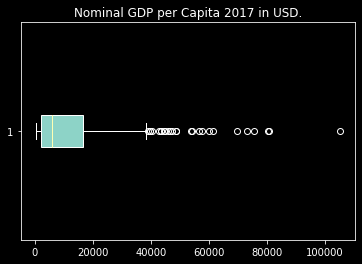

<IPython.core.display.Javascript object>

In [8]:
plt.style.use("dark_background")
plt.boxplot(df.nominal, vert=False, patch_artist=True)
plt.title("Nominal GDP per Capita 2017 in USD.")
plt.show()

A boxplot is a convienient way to visualise key aspects of a set of values. 

In [9]:
df.sort_values(by=["nominal"], inplace=True, ascending=False)
df.head()

,rank,country,ppp,nominal,~world
2,3,Luxembourg,"$107,641",105280,629%
1,2,Macao,"$115,367",80890,675%
8,9,Switzerland,"$66,307",80296,388%
10,11,Norway,"$62,183",75428,364%
13,14,Iceland,"$55,322",73233,324%


<IPython.core.display.Javascript object>

https://www.statisticshowto.com/probability-and-statistics/skewed-distribution/
The data is clearly skewed. If you haven't learned what this means yet, just observe that is is not symetric about the means value, and consider what this might tell us about the data. We will look at skew in another lesson.

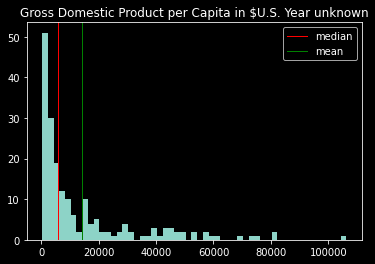

<IPython.core.display.Javascript object>

In [10]:
# plt.hist(df.PerCapitaGDP)
data = df.nominal
binwidth = 2000
median = np.median(data)
mean = np.mean(data)
# mode = np.mode()
plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
plt.axvline(median, color="red", linestyle="solid", linewidth=1)
plt.axvline(mean, color="green", linestyle="solid", linewidth=1)
plt.plot([], [], "-", linewidth=1, color="red", label="median")
plt.plot([], [], "-", linewidth=1, color="green", label="mean")
plt.legend()
plt.title("Gross Domestic Product per Capita in $U.S. Year unknown")

plt.show()